In [ ]:
import numpy as np
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.datasets import mnist
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras import utils
import pandas as pd
from sklearn.metrics import classification_report,confusion_matrix
from tensorflow.keras.preprocessing import image

In [ ]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [5]:

X_train.shape


(60000, 28, 28)

In [6]:
X_test.shape

(10000, 28, 28)

In [7]:
single_image= X_train[4000]

In [8]:
single_image.shape

(28, 28)

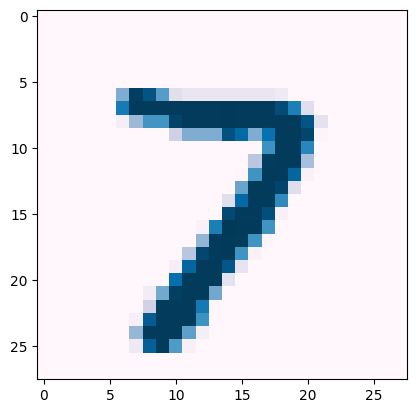

In [9]:
plt.imshow(single_image,cmap='PuBu')

In [ ]:
y_train.shape

In [11]:

X_train.min()

0

In [12]:
X_train.max()

255

In [13]:
X_train_scaled = X_train/255.0
X_test_scaled = X_test/255.0

In [14]:

X_train_scaled.min()

0.0

In [15]:
X_train_scaled.max()

1.0

In [16]:
y_train[0]

5

In [17]:
y_train_onehot = utils.to_categorical(y_train,10)
y_test_onehot = utils.to_categorical(y_test,10)

In [18]:
type(y_train_onehot)

numpy.ndarray

In [19]:
y_train_onehot.shape

(60000, 10)

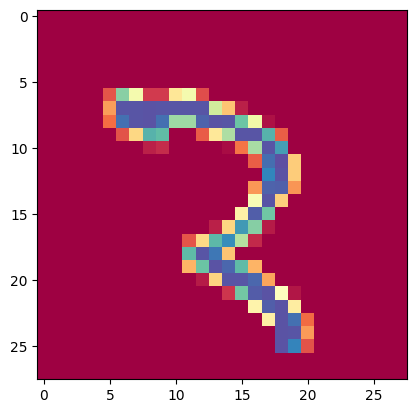

In [20]:
single_image = X_train[500]
plt.imshow(single_image,cmap='Spectral')

In [21]:
y_train_onehot[500]

array([0., 0., 0., 1., 0., 0., 0., 0., 0., 0.], dtype=float32)

In [22]:
X_train_scaled = X_train_scaled.reshape(-1,28,28,1)
X_test_scaled = X_test_scaled.reshape(-1,28,28,1)

In [23]:
X_test_scaled.shape

(10000, 28, 28, 1)

In [24]:
print("Name : Easwari M")
print("Register Number : 212223240033")

Name : Easwari M
Register Number : 212223240033


In [25]:
classifier = keras.Sequential()
c1=layers.Input(shape=(28,28,1))
classifier.add(c1)
c2=layers.Conv2D(filters=32,kernel_size=(3,3),activation='relu')
classifier.add(c2)
c3=layers.MaxPool2D(pool_size=(2,2))
classifier.add(c3)
c4=layers.Flatten()
classifier.add(c4)
c5=layers.Dense(32,activation='relu')
classifier.add(c5)
c6=layers.Dense(64,activation='relu')
classifier.add(c6)
c7=layers.Dense(32,activation='relu')
classifier.add(c7)
c8=layers.Dense(10,activation='softmax')
classifier.add(c8)




In [26]:
classifier.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 32)        0         
 D)                                                              
                                                                 
 flatten (Flatten)           (None, 5408)              0         
                                                                 
 dense (Dense)               (None, 32)                173088    
                                                                 
 dense_1 (Dense)             (None, 64)                2112      
                                                                 
 dense_2 (Dense)             (None, 32)                2080      
                                                        

In [28]:
classifier.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics='accuracy')

In [29]:
classifier.fit(X_train_scaled ,y_train_onehot, epochs=4,
     batch_size=64,
     validation_data = (X_test_scaled,y_test_onehot))


Epoch 1/4
938/938 [==============================] - 28s 28ms/step - loss: 0.2754 - accuracy: 0.9194 - val_loss: 0.0973 - val_accuracy: 0.9679
Epoch 2/4
938/938 [==============================] - 22s 24ms/step - loss: 0.0782 - accuracy: 0.9765 - val_loss: 0.0551 - val_accuracy: 0.9825
Epoch 3/4
938/938 [==============================] - 23s 25ms/step - loss: 0.0531 - accuracy: 0.9836 - val_loss: 0.0507 - val_accuracy: 0.9826
Epoch 4/4
938/938 [==============================] - 23s 25ms/step - loss: 0.0404 - accuracy: 0.9873 - val_loss: 0.0557 - val_accuracy: 0.9806


In [30]:
metrics = pd.DataFrame(classifier.history.history)

In [ ]:
metrics.head()

,loss,accuracy,val_loss,val_accuracy
0,0.241727,0.928533,0.092228,0.9708
1,0.072542,0.977117,0.057627,0.9812
2,0.051131,0.984383,0.057368,0.9816
3,0.039311,0.987717,0.065148,0.9815
4,0.030833,0.990050,0.054147,0.9822


Text(0.1, 1.0, 'Easwari M : 212223240033')

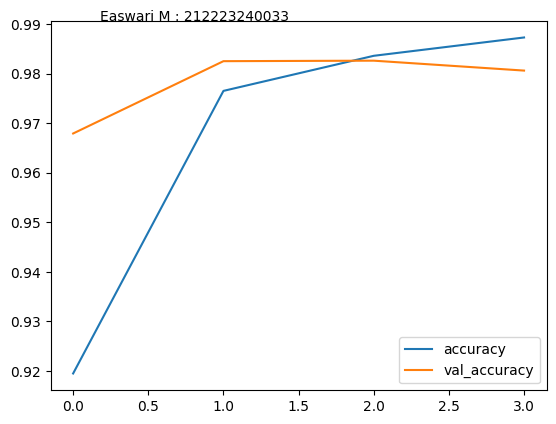

In [57]:
metrics[['accuracy','val_accuracy']].plot()
plt.text(0.1, 1.0, f'Easwari M : 212223240033', transform=plt.gca().transAxes)

Text(0.1, 0.9, 'Easwari M : 212223240033')

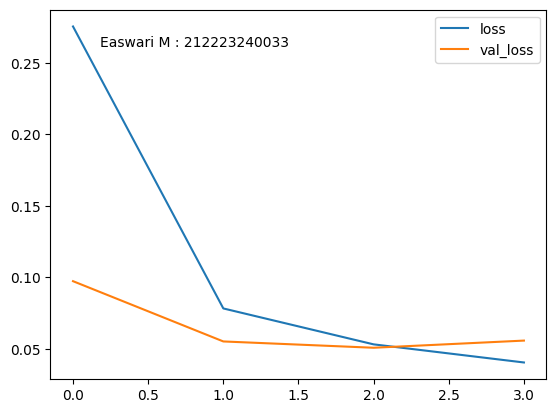

In [53]:
metrics[['loss','val_loss']].plot()
plt.text(0.1, 0.9, f'Easwari M : 212223240033', transform=plt.gca().transAxes)

In [33]:
x_test_predictions = np.argmax(classifier.predict(X_test_scaled), axis=1)


313/313 [==============================] - 2s 6ms/step


In [34]:
print(confusion_matrix(y_test,x_test_predictions))

[[ 975    0    0    1    0    0    2    0    2    0]
 [   0 1111    2    0    1    0    5    2   14    0]
 [   6    1 1008    2    2    0    2    5    6    0]
 [   0    0    5  995    0    6    0    1    3    0]
 [   1    0    0    0  969    0    5    0    3    4]
 [   2    0    0    8    0  870    8    0    4    0]
 [  10    1    0    0    3    3  939    0    2    0]
 [   1    1    8    1    1    0    0 1010    3    3]
 [   6    0    5    0    2    0    1    1  958    1]
 [   4    1    1    4    7    3    1    7   10  971]]


In [35]:
print(classification_report(y_test,x_test_predictions))

              precision    recall  f1-score   support

           0       0.97      0.99      0.98       980
           1       1.00      0.98      0.99      1135
           2       0.98      0.98      0.98      1032
           3       0.98      0.99      0.98      1010
           4       0.98      0.99      0.99       982
           5       0.99      0.98      0.98       892
           6       0.98      0.98      0.98       958
           7       0.98      0.98      0.98      1028
           8       0.95      0.98      0.97       974
           9       0.99      0.96      0.98      1009

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000



In [38]:
img = image.load_img('num.jpg')


In [39]:
type(img)

PIL.JpegImagePlugin.JpegImageFile

In [40]:
img = image.load_img('num.jpg')
img_tensor = tf.convert_to_tensor(np.asarray(img))
img_28 = tf.image.resize(img_tensor,(28,28))
img_28_gray = tf.image.rgb_to_grayscale(img_28)
img_28_gray_scaled = img_28_gray.numpy()/255.0

In [41]:
x_single_prediction = np.argmax(
    classifier.predict(img_28_gray_scaled.reshape(1,28,28,1)),
     axis=1)

1/1 [==============================] - 0s 33ms/step


In [42]:
print(x_single_prediction)


[8]


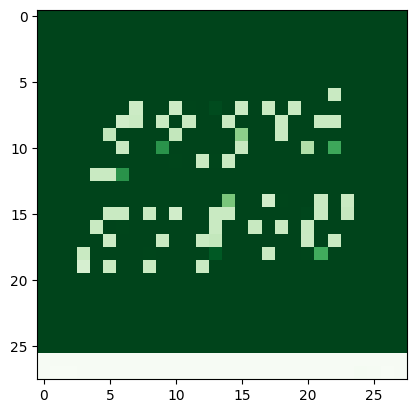

In [61]:
plt.imshow(img_28_gray_scaled.reshape(28,28),cmap='Greens')

In [48]:
img_28_gray_inverted = 255.0-img_28_gray
img_28_gray_inverted_scaled = img_28_gray_inverted.numpy()/255.0

In [49]:

x_single_prediction = np.argmax(
    classifier.predict(img_28_gray_inverted_scaled.reshape(1,28,28,1)),
     axis=1)

1/1 [==============================] - 0s 23ms/step


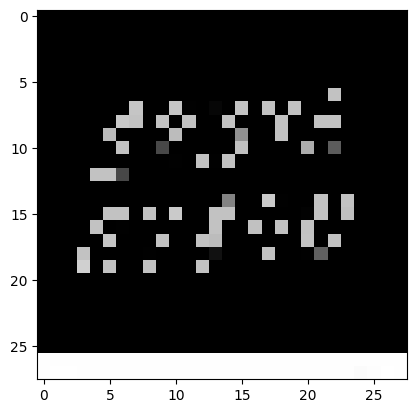

In [62]:
plt.imshow(img_28_gray_inverted_scaled.reshape(28,28),cmap='gray')